## Observations and Insights
One thing that I noticed was that 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_df = mouse_metadata_df.merge(study_results_df, on = 'Mouse ID')
# Display the data table for preview
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_data_df['Mouse ID'].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_df.loc[mouse_data_df['Mouse ID'].duplicated(), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_df['Mouse ID'].drop_duplicates(inplace = True)
mouse_data_df['Mouse ID']


0       k403
10      s185
20      x401
30      m601
40      g791
        ... 
1858    z314
1860    z435
1863    z581
1873    z795
1883    z969
Name: Mouse ID, Length: 249, dtype: object

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = mouse_data_df['Mouse ID'].count()
mouse_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_data_df['Drug Regimen'].value_counts()
capomulin_df = mouse_data_df.loc[(mouse_data_df['Drug Regimen'] == 'Capomulin') & mouse_data_df['Tumor Volume (mm3)']]
ramicane_df = mouse_data_df.loc[(mouse_data_df['Drug Regimen'] == 'Ramicane') & mouse_data_df['Tumor Volume (mm3)']]
ketapril_df = mouse_data_df.loc[(mouse_data_df['Drug Regimen'] == 'Ketapril') & mouse_data_df['Tumor Volume (mm3)']]
naftisol_df = mouse_data_df.loc[(mouse_data_df['Drug Regimen'] == 'Naftisol') & mouse_data_df['Tumor Volume (mm3)']]
zoniferol_df = mouse_data_df.loc[(mouse_data_df['Drug Regimen'] == 'Zoniferol') & mouse_data_df['Tumor Volume (mm3)']]
placebo_df = mouse_data_df.loc[(mouse_data_df['Drug Regimen'] == 'Placebo') & mouse_data_df['Tumor Volume (mm3)']]
stelasyn_df = mouse_data_df.loc[(mouse_data_df['Drug Regimen'] == 'Stelasyn') & mouse_data_df['Tumor Volume (mm3)']]
ceftamin_df = mouse_data_df.loc[(mouse_data_df['Drug Regimen'] == 'Ceftamin') & mouse_data_df['Tumor Volume (mm3)']]
infubinol_df = mouse_data_df.loc[(mouse_data_df['Drug Regimen'] == 'Infubinol') & mouse_data_df['Tumor Volume (mm3)']]
propriva_df = mouse_data_df.loc[(mouse_data_df['Drug Regimen'] == 'Propriva') & mouse_data_df['Tumor Volume (mm3)']]
capomulin_mean = np.mean(capomulin_df['Tumor Volume (mm3)'])
capomulin_median = np.median(capomulin_df['Tumor Volume (mm3)'])
capomulin_variance = np.var(capomulin_df['Tumor Volume (mm3)'], ddof = 0)
capomulin_std = np.std(capomulin_df['Tumor Volume (mm3)'], ddof = 0)
capomulin_sem = st.sem(capomulin_df['Tumor Volume (mm3)'])
ramicane_mean = np.mean(ramicane_df['Tumor Volume (mm3)'])
ramicane_median = np.median(ramicane_df['Tumor Volume (mm3)'])
ramicane_variance = np.var(ramicane_df['Tumor Volume (mm3)'], ddof = 0)
ramicane_std = np.std(ramicane_df['Tumor Volume (mm3)'], ddof = 0)
ramicane_sem = st.sem(ramicane_df['Tumor Volume (mm3)'])
ketapril_mean = np.mean(ketapril_df['Tumor Volume (mm3)'])
ketapril_median = np.median(ketapril_df['Tumor Volume (mm3)'])
ketapril_variance = np.var(ketapril_df['Tumor Volume (mm3)'], ddof = 0)
ketapril_std = np.std(ketapril_df['Tumor Volume (mm3)'], ddof = 0)
ketapril_sem = st.sem(ketapril_df['Tumor Volume (mm3)'])
naftisol_mean = np.mean(naftisol_df['Tumor Volume (mm3)'])
naftisol_median = np.median(naftisol_df['Tumor Volume (mm3)'])
naftisol_variance = np.var(naftisol_df['Tumor Volume (mm3)'], ddof = 0)
naftisol_std = np.std(naftisol_df['Tumor Volume (mm3)'], ddof = 0)
naftisol_sem = st.sem(naftisol_df['Tumor Volume (mm3)'])
zoniferol_mean = np.mean(zoniferol_df['Tumor Volume (mm3)'])
zoniferol_median = np.median(zoniferol_df['Tumor Volume (mm3)'])
zoniferol_variance = np.var(zoniferol_df['Tumor Volume (mm3)'], ddof = 0)
zoniferol_std = np.std(zoniferol_df['Tumor Volume (mm3)'], ddof = 0)
zoniferol_sem = st.sem(zoniferol_df['Tumor Volume (mm3)'])
placebo_mean = np.mean(placebo_df['Tumor Volume (mm3)'])
placebo_median = np.median(placebo_df['Tumor Volume (mm3)'])
placebo_variance = np.var(placebo_df['Tumor Volume (mm3)'], ddof = 0)
placebo_std = np.std(placebo_df['Tumor Volume (mm3)'], ddof = 0)
placebo_sem = st.sem(placebo_df['Tumor Volume (mm3)'])
stelasyn_mean = np.mean(stelasyn_df['Tumor Volume (mm3)'])
stelasyn_median = np.median(stelasyn_df['Tumor Volume (mm3)'])
stelasyn_variance = np.var(stelasyn_df['Tumor Volume (mm3)'], ddof = 0)
stelasyn_std = np.std(stelasyn_df['Tumor Volume (mm3)'], ddof = 0)
stelasyn_sem = st.sem(stelasyn_df['Tumor Volume (mm3)'])
ceftamin_mean = np.mean(ceftamin_df['Tumor Volume (mm3)'])
ceftamin_median = np.median(ceftamin_df['Tumor Volume (mm3)'])
ceftamin_variance = np.var(ceftamin_df['Tumor Volume (mm3)'], ddof = 0)
ceftamin_std = np.std(ceftamin_df['Tumor Volume (mm3)'], ddof = 0)
ceftamin_sem = st.sem(ceftamin_df['Tumor Volume (mm3)'])
infubinol_mean = np.mean(infubinol_df['Tumor Volume (mm3)'])
infubinol_median = np.median(infubinol_df['Tumor Volume (mm3)'])
infubinol_variance = np.var(infubinol_df['Tumor Volume (mm3)'], ddof = 0)
infubinol_std = np.std(infubinol_df['Tumor Volume (mm3)'], ddof = 0)
infubinol_sem = st.sem(infubinol_df['Tumor Volume (mm3)'])
propriva_mean = np.mean(propriva_df['Tumor Volume (mm3)'])
propriva_median = np.median(propriva_df['Tumor Volume (mm3)'])
propriva_variance = np.var(propriva_df['Tumor Volume (mm3)'], ddof = 0)
propriva_std = np.std(propriva_df['Tumor Volume (mm3)'], ddof = 0)
propriva_sem = st.sem(propriva_df['Tumor Volume (mm3)'])

Drug_Summary = {'Drug': ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
                'Mean': [capomulin_mean, ramicane_mean, ketapril_mean, naftisol_mean, zoniferol_mean, placebo_mean, stelasyn_mean, ceftamin_mean, infubinol_mean, propriva_mean],
                'Median': [capomulin_median, ramicane_median, ketapril_median, naftisol_median, zoniferol_median, placebo_median, stelasyn_median, ceftamin_median, infubinol_median, propriva_median],
                'Variance': [capomulin_variance, ramicane_variance, ketapril_variance, naftisol_variance, zoniferol_variance, placebo_variance, stelasyn_variance, ceftamin_variance, infubinol_variance, propriva_variance],
                'Standard Deviation': [capomulin_std, ramicane_std, ketapril_std, naftisol_std, zoniferol_std, placebo_std, stelasyn_variance, ceftamin_std, infubinol_std, propriva_std],
                'SEM': [capomulin_sem, ramicane_sem, ketapril_sem, naftisol_sem, zoniferol_sem, placebo_sem, stelasyn_sem, ceftamin_sem, infubinol_sem, propriva_sem]
               }
Drug_Summary_df = pd.DataFrame(Drug_Summary, columns = ['Drug', 'Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM'])
Drug_Summary_df

,Drug,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
1,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
2,Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
3,Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
4,Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
5,Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
6,Stelasyn,54.233149,52.431737,59.122106,59.122106,0.573111
7,Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
8,Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
9,Propriva,52.322552,50.854632,42.088020,6.487528,0.512884


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_data_df['Drug Regimen'].value_counts()
# This method produces everything in a single groupby function

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

## Bar and Pie Charts

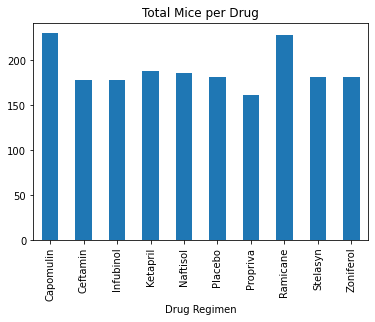

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using panda
bar_data_df = mouse_data_df.groupby('Drug Regimen')
bar_data_count_df = bar_data_df['Drug Regimen'].count()
bar_data_count_df.plot(kind = 'bar', title="Total Mice per Drug")

Text(0, 0.5, 'Count')

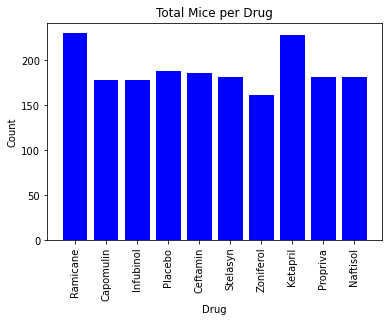

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_names = mouse_data_df['Drug Regimen'].drop_duplicates()
plt.bar(drug_names, bar_data_count_df, color='b')
plt.xticks(rotation=90)
plt.title("Total Mice per Drug")
plt.xlabel("Drug")
plt.ylabel("Count")

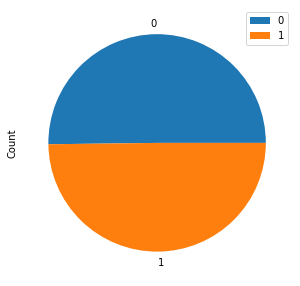

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_df = mouse_data_df.loc[(mouse_data_df['Sex'] == 'Male')]
female_df = mouse_data_df.loc[(mouse_data_df['Sex'] == 'Female')]
male_count_df = male_df.nunique()
female_count_df = female_df.nunique()
male = male_count_df['Mouse ID']
female = female_count_df['Mouse ID']
gender_summary = {'Gender': ['Male', 'Female'],
                  'Count': [male, female],
                 }
gender_summary_df = pd.DataFrame(gender_summary, columns = ['Gender', 'Count'])
plot = gender_summary_df.plot.pie(y='Count', figsize=(5, 5))

c:\users\15309\anaconda3\envs\python_data\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


ValueError: 'label' must be of length 'x'

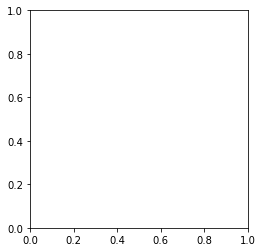

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Female'
fig1, ax1 = plt.subplots()
ax1.pie(male, labels=labels, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = pd.DataFrame({'Timepoint': mouse_data_df.groupby(['Mouse ID'])['Timepoint'].max()}).reset_index()
greatest_timepoint_df
#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df = greatest_timepoint_df.merge(mouse_data_df, on=['Mouse ID', 'Timepoint'], how='inner')
new_df

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
test_drug_df = mouse_data_df

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
drug_list = []
#test_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    test_df = test_drug_df.loc[test_drug_df['Drug Regimen'] == drug, :]
    quartiles = test_df['Tumor Volume (mm3)'].quartile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = test_df.loc[(test_df['Tumor Volume (mm3)'] < lower_bound) | (test_df['Tumor Volume (mm3)'] > upper_bound)]
    print("For the" + drug + "regimen:")
    print("The lowest quartile is" + str(round(lowerq),2))
    print("The highest quartile is" + str(round(upperq),2))
    print("The IQR is" + str(round(iqr),2))
    print("The outlier bounderies are" + str(round(lower_bound),2) + "and" + str(round(upper_bound),2))
    print("The potential outlies are" + drug + "regimen" + "=" + str(outliers))
    tumor_volume.append(test_df['Tumor Volume (mm3)']) 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

Text(0, 0.5, 'Tumor')

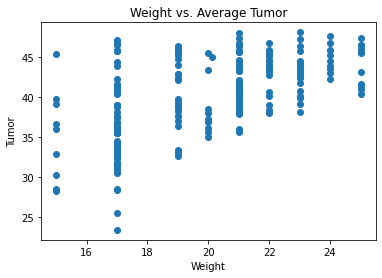

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
tumor_df = capomulin_df.groupby('Tumor Volume (mm3)', as_index=False)['Weight (g)'].mean()
tumor = tumor_df['Tumor Volume (mm3)']
weight = tumor_df['Weight (g)']
plt.scatter(weight, tumor)
plt.title("Weight vs. Average Tumor")
plt.xlabel("Weight")
plt.ylabel("Tumor")